<a href="https://colab.research.google.com/github/javier1nc/infotec-Clasificacion-de-frutas/blob/main/Clasificacion_de_frutas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Checking number of classes

In [5]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=737d2800d47014e30fbff89a6a6c3daeedcdf83b7dbfce53902650fd8e25c9eb
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [6]:
!wget -N "https://objects-us-east-1.dream.io/infotec/frutas.zip"
!unzip -qo frutas.zip

--2022-12-01 05:33:32--  https://objects-us-east-1.dream.io/infotec/frutas.zip
Resolving objects-us-east-1.dream.io (objects-us-east-1.dream.io)... 208.113.201.37, 2607:f298:5:ee00::33
Connecting to objects-us-east-1.dream.io (objects-us-east-1.dream.io)|208.113.201.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6423177 (6.1M) [application/zip]
Saving to: ‘frutas.zip’

frutas.zip          100%[===================>]   6.12M  --.-KB/s    in 0.08s   

2022-12-01 05:33:33 (72.4 MB/s) - ‘frutas.zip’ saved [6423177/6423177]



In [7]:
import os
chart_types = os.listdir(r'./frutas/')
print(chart_types)

['Orange', 'Blueberry', 'Banana']


## Loading images and their respective label

In [10]:

import cv2             # install and import opencv-python : a library with various image processing tool.
path = r"./frutas/"
im_size = 224

# In images list we store all the resized images
#The images which are resize and converted into 223 by 224

images = []

#Store the corresponding labels in the labels list

labels = []

#This loop will take us in a folder one by one
#The functionality in the second for loop is performed folder by folder
for i in chart_types:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path)]
# The Second loop here is performing the resizing concept     
    for f in filenames:        
            img=cv2.imread(data_path + '/' + f)
          #  print(img)
            try:
                img = cv2.resize(img, (im_size, im_size), interpolation=cv2.INTER_NEAREST)
                #print(img.shape)
            except:
                break
          #  height, width , layers = img.shape
          #  size=(width,height)
            #print(img.shape)
            #print(img)
            images.append(img)
            labels.append(i)
#print(labels)
#print(images)

## Transform the image array to a numpy type

In [11]:
import numpy as np
images = np.array(images)
#print(images)
print(images.shape)

(1431, 224, 224, 3)


## Encode the label

In [12]:
from sklearn.preprocessing import LabelEncoder    # intall sklearn and import - a library with various traditional machine 
                                                  # learning models

labels_labelencoder = LabelEncoder()
y = labels_labelencoder.fit_transform(labels)
#print(labels)
#print("blueberry: 0, naranja : 1, platano: 2 \n")
print(y)

[2 2 2 ... 0 0 0]


## Split data into training and testing set

In [13]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.18, random_state=42)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1173, 224, 224, 3)
(1173,)
(258, 224, 224, 3)
(258,)


## Model MLP

In [14]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

model = keras.Sequential([
keras.layers.Flatten(input_shape=(224,224,3)),
#keras.layers.Dropout(0.5),
keras.layers.Dense(256, activation=tf.nn.sigmoid, name="h1"),
keras.layers.Dense(256, activation=tf.nn.sigmoid, name="h2"),
keras.layers.Dense(250, activation=tf.nn.sigmoid, name="h3"),
keras.layers.Dense(50, activation=tf.nn.sigmoid, name="h4"),
keras.layers.Dense(3, activation=tf.nn.softmax)])

model.summary()

#model = Sequential()
#model.add(Flatten(input_shape=(224,224,3)))
#model.add(Dropout(0.2))
#model.add(Dense(256, activation=tf.nn.relu))
#model.add(Dense(50, activation=tf.nn.relu))
#model.add(Dense(3, activation=tf.nn.softmax))
#model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 h1 (Dense)                  (None, 256)               38535424  
                                                                 
 h2 (Dense)                  (None, 256)               65792     
                                                                 
 h3 (Dense)                  (None, 250)               64250     
                                                                 
 h4 (Dense)                  (None, 50)                12550     
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 38,678,169
Trainable params: 38,678,169
No

## Set parameters to compile the model

In [15]:
model.compile(optimizer = 'adam',loss = keras.losses.binary_crossentropy,metrics=['accuracy'])
#model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentopy',metrics = ['accuracy'])

In [16]:
history = model.fit(train_x,train_y,epochs=100)
#history = model.fit(train_x, train_y, epochs=10, batch_size=250, verbose=3, validation_split=0.2)
#train_y = tf.one_hot(train_y, 10)
#history = model.fit(train_x, train_y, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, batch_size=2048, verbose=1, validation_split=1)

Epoch 1/100
37/37 [==============================] - 8s 175ms/step - loss: 1.1361 - accuracy: 0.3564
Epoch 2/100
37/37 [==============================] - 6s 170ms/step - loss: 1.0972 - accuracy: 0.3427
Epoch 3/100
37/37 [==============================] - 6s 158ms/step - loss: 1.0969 - accuracy: 0.3282
Epoch 4/100
37/37 [==============================] - 6s 166ms/step - loss: 1.0968 - accuracy: 0.3257
Epoch 5/100
37/37 [==============================] - 7s 185ms/step - loss: 1.0968 - accuracy: 0.3120
Epoch 6/100
37/37 [==============================] - 6s 173ms/step - loss: 1.0968 - accuracy: 0.3376
Epoch 7/100
37/37 [==============================] - 6s 169ms/step - loss: 1.0968 - accuracy: 0.3333
Epoch 8/100
37/37 [==============================] - 7s 183ms/step - loss: 1.0968 - accuracy: 0.3419
Epoch 9/100
37/37 [==============================] - 6s 173ms/step - loss: 1.0968 - accuracy: 0.3342
Epoch 10/100
37/37 [==============================] - 7s 180ms/step - loss: 1.0968 - accura

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report
#cv_scores = cross_val_score(model, train_x, train_y, cv=5)
#print("CV average score: %.2f" % cv_scores.mean())

pred_y_NN=model.predict(test_x)
#accuracy_score(test_y, pred_y_NN)
#cr = classification_report(test_y, pred_y_NN)
print(pred_y_NN)
#auc(test_y, pred_y_NN, round=True)

9/9 [==============================] - 1s 59ms/step
[[0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065 0.3333682  0.33331105]
 [0.33332065

Save the model

In [18]:
model.save('MLP_5.h9')

### Load the save model and test over a single dataset

In [19]:
#pip install Flask-SQLAlchemy

In [20]:
from sqlalchemy.orm import mapper
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
model = tensorflow.keras.models.load_model('MLP_5.h9')

In [21]:
import matplotlib.pyplot as plt
import cv2 as cv
# Convertir la imagen a NumPy array
from matplotlib.image import imread
import numpy as np

In [22]:
img = load_img('./platano1.jpg', target_size=(224, 224))

print(type(img))

FileNotFoundError: ignored

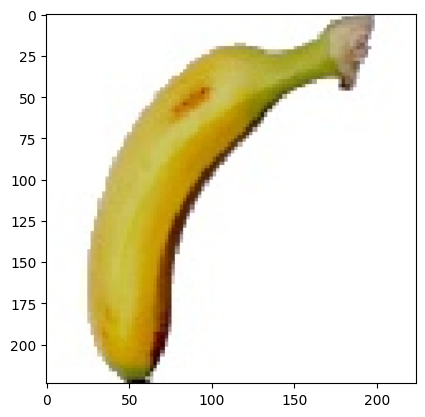

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
#print(img)

In [ ]:

predict = model.predict(img)
classes=predict=np.argmax(predict,axis=1)
#move_name = mapper(predict)
#print("La predict is {}.".format(move_name))

1/1 [==============================] - 0s 31ms/step


In [ ]:
if classes==0:
    print('blueberry')
elif classes==1:
    print('Naranja')

elif classes==2:
     print('platano')


Naranja


In [ ]:
print(predict)

[2]
